# Filtro passa baixas passivo com frequência de corde 4 kHz e atenuação de 20 dB/década após a Fc 

      O presente trabalho tem como objetivo analisar o projeto de um filtro passa-baixas passivo com frequência de corte de 4 kHz e atenuação de 60 dB por década após a frequência de corte.  Para tanto, são necessários 3 capacitores, como pode ser visto na Figura 1.

<img src="static/Projeto - Filtro de 3ª Ordem (1).png">
<center>Figura 1 - Circuito para um filtro passa-baixas passivo de terceira ordem.</center>


      Podemos analisar esse circuito como sendo composto por 3 estágios, como 3 filtros passa-baixas de primeira ordem em cascata. Para tanto, a impedância do estágio 2 deve ser significativamente maior que a impedância do estágio 1 e significativamente menor que a do estágio 3 . Por esse viés, consideramos que a resistência R2 é 10 vezes maior que R1 e 10 vezes menor R3. Pelo mesmo princípio, como a reatância é inversamente proporcional à capacitância, consideramos a capacitância C2 10 vezes menor que C1 e 10 vezes maior que C3. Essas definições podem ser ilustradas na Figura 2.  

<img src="static/Projeto - Filtro de 3ª Ordem (2).png">
<center>Figura 2 - Circuito para um filtro passa-baixas passivo de terceira ordem.</center>



      Para encontrar a função de transferência G(s) do filtro, considerando a impedância de um estágio muito maior que a do estágio anterior, podemos aproximar as tensões V01, V02 e Vout por divisores de tensão simples, de modo que: 

$$V_{01} = V_{in} \frac{\frac{1}{sC}}{R+\frac{1}{sC}}$$
   $$V_{02} = V_{01} \frac{\frac{1}{sC}}{10R+\frac{1}{s0.1C}}$$
   $$V_{out} = V_{02} \frac{\frac{1}{sC}}{100R+\frac{1}{s0.001C}}$$
   $$V_{out} = V_{in} (\frac{\frac{1}{sC}}{R+\frac{1}{sC}})^3$$
   $$G(s) = \frac{V_{out}}{V_{in}} = (\frac{\frac{1}{sC}}{R+\frac{1}{sC}})^3$$
$$G(s)  = (\frac{1}{sRC+1})^3 $$


      Nosso filtro deve ter um frequência de corte de 4 kHz, isso significa que para uma frequência de 4 kHz a atenuação do filtro deve ser de -3dBm. Com outras palavras, o ganho do filtro deve ser 0,707 V/V para uma frequência de 4 kHz. Tal que: 



 $$G(2\pi4\cdot10^{3}) = |(\frac{1}{2\pi4\cdot10^{3}RC+1}|^3 = 0.707$$
 
 $$|\frac{1}{2\pi4\cdot10^{3}RC+1}| = \sqrt[3]{0.707}$$
  
 $$\frac{1}{\sqrt{(2\pi4\cdot10^{3}RC)^2+1}} = 0.89$$
 
 $$\sqrt{(2\pi4\cdot10^{3}RC)^2+1} = 0.89^{-1}$$

 $$ 2\pi4\cdot10^{3}RC^2+1 = 1.1236^2 $$

 $$ 2\pi4\cdot10^{3}RC = \sqrt{1.2625-1} $$

 $$ RC = \frac{\sqrt{1.2625-1}}{2\pi4\cdot10^{3}}$$
 
 $$ RC = 2.0385 \cdot 10^{-5} $$

      Assim, para atendermos a proporção de RC calculada e devido a disponibilidade de valores comerciais dos capacitores, definimos C = 100 nF. Desse modo, teoricamente: 


$$ C_1 = 100 nF $$
$$ R_1 = 203.85 \Omega $$
$$ C_2 = 10 nF $$
$$ R_2 = 2038.5 \Omega $$
$$ C_3 = 1 nF $$
$$ R_3 = 20385 \Omega $$

       Uma vez que encontramos a função de transferência do filtro e os valores de R e C desejados, geramos o gráfico do ganho teórico do filtro. 

In [27]:
import math
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from cmath import phase

R = 203.85
C = 100e-9 

f = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
     900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
     30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000, 600000, 700000, 800000, 900000])

<IPython.core.display.Javascript object>


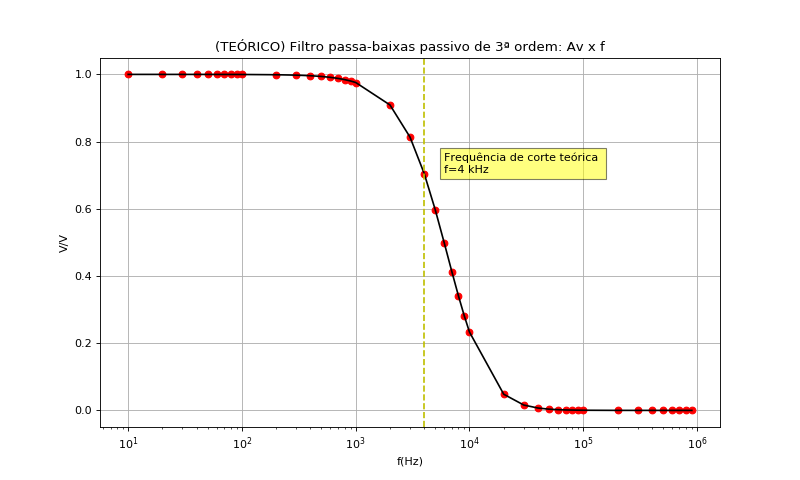

In [28]:
%matplotlib notebook

av_teorico = np.zeros(len(f))

def Av(fi): 
    return (1/math.sqrt(1 + (2 * math.pi * fi * R * C)**2))**3

for i in range(len(f)): 
    av_teorico[i] = Av(f[i])

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, av_teorico,'ro', f, av_teorico,'k')
plt.title('(TEÓRICO) Filtro passa-baixas passivo de 3ª ordem: Av x f')
plt.text(6000, 0.707, "Frequência de corte teórica \nf=%d kHz" %4,  bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvline(x=4000, color='y', linestyle='--')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.plot(0,1)
plt.grid()
plt.show()


<IPython.core.display.Javascript object>


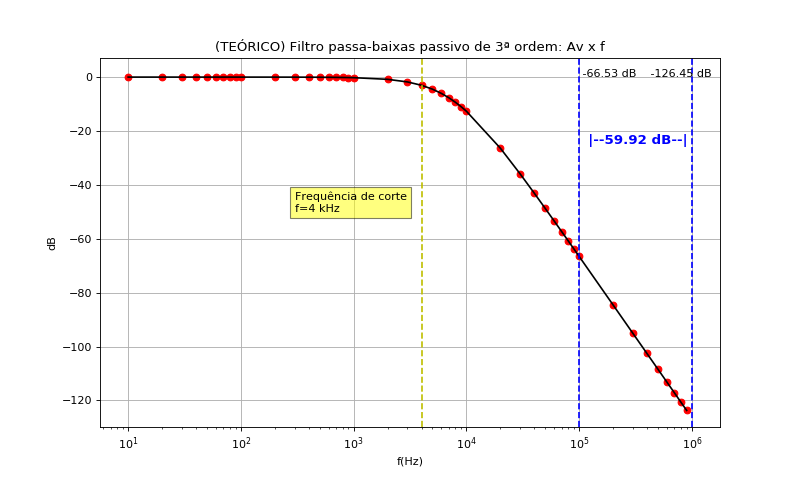

In [29]:
db10e4 = 20*np.log10(Av(10e4))
db10e5 = 20*np.log10(Av(10e5))

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, 20*np.log10(av_teorico),'ro', f, 20*np.log10(av_teorico),'k')
plt.title('(TEÓRICO) Filtro passa-baixas passivo de 3ª ordem: Av x f')
plt.text(300, -50, "Frequência de corte\nf=%d kHz" %4,  bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvline(x=4000, color='y', linestyle='--')

plt.axvline(x=10e4, color='b', linestyle='--')
plt.text(10e4, 0, " %.2f dB" %db10e4)
plt.axvline(x=10e5, color='b', linestyle='--')
plt.text(10e5/2.5, 0, " %.2f dB" %db10e5)

plt.text(10e4, -25, "  |--%.2f dB--|" %(db10e4-db10e5), color="blue", fontweight='bold', fontsize="12")

plt.ylabel('dB')
plt.xlabel('f(Hz)')
plt.plot(0,1)
plt.grid()
plt.show()


<IPython.core.display.Javascript object>


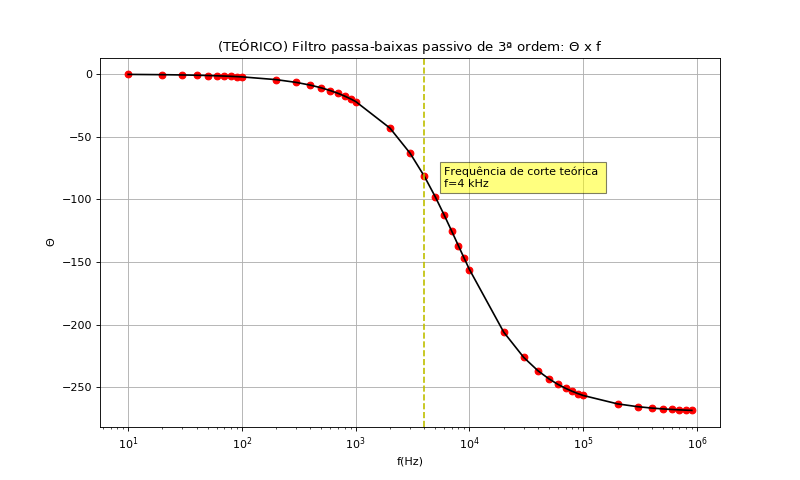

In [24]:
fase_teorica = np.zeros(len(f))

def defasagem(fi): 
    a = np.angle((1/(1 + 2*np.pi*fi*1j*R*C)**3), deg=True)
    if a > 0: 
        return a -360 
    else: 
        return a

for i in range(len(f)): 
    fase_teorica[i] = defasagem(f[i])

plt.figure(figsize=(10,6))
plt.title(r"(TEÓRICO) Filtro passa-baixas passivo de 3ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f, fase_teorica,'ro', f, fase_teorica, 'k')
plt.text(6000, -90, "Frequência de corte teórica \nf=%d kHz" %4,  bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvline(x=4000, color='y', linestyle='--')
plt.ylabel(r"$\Theta$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

        Em seguida, utilizamos o LTSpice para simular o circuito proposto.  

In [9]:
from numpy import genfromtxt
data = genfromtxt('static/filtro_3_ordem - simulacao-LTSpice.csv', delimiter=',')
av_ltspice_db = data[:, 1]
av_ltspice = 10**(av_ltspice_db/20)
f_ltspice = data[:, 0]
fase_ltspice = data[:, 2]

<IPython.core.display.Javascript object>


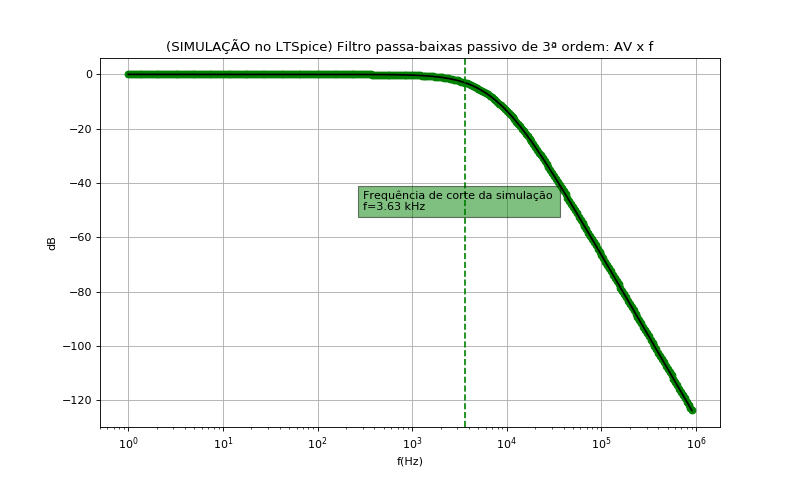

In [30]:
plt.figure(figsize=(10,6))
plt.title(r"(SIMULAÇÃO no LTSpice) Filtro passa-baixas passivo de 3ª ordem: AV x f")
plt.xscale('log')
plt.plot(f_ltspice, 20*np.log10(av_ltspice), 'go', f_ltspice, 20*np.log10(av_ltspice), 'k')
plt.text(300, -50, "Frequência de corte da simulação \nf=%.2f kHz" %3.63,  bbox=dict(facecolor='green', alpha=0.5))
plt.axvline(x=3630, color='g', linestyle='--')


plt.ylabel(r"dB")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


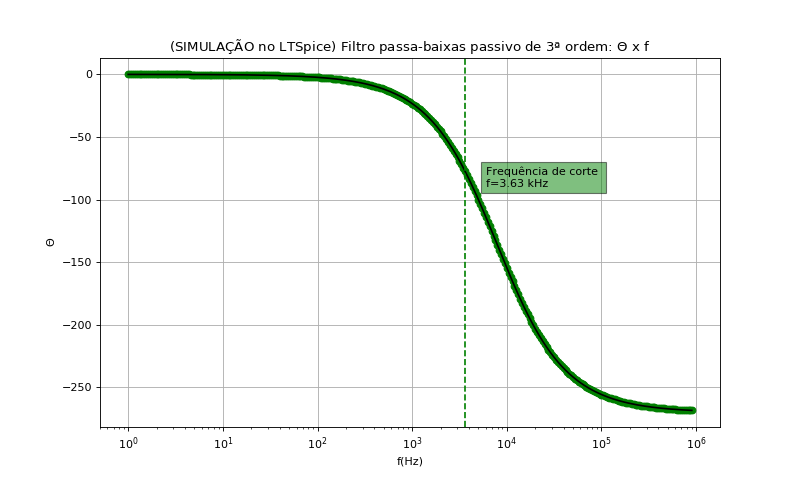

In [11]:
def converter_defasagem(a): 
    if a > 0: 
        return a -360 
    else: 
        return a
    
for i, teta in enumerate(fase_ltspice): 
    fase_ltspice[i] = converter_defasagem(teta)
    
plt.figure(figsize=(10,6))
plt.title(r"(SIMULAÇÃO no LTSpice) Filtro passa-baixas passivo de 3ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f_ltspice, fase_ltspice,'go', f_ltspice, fase_ltspice, 'k')
plt.text(6000, -90, "Frequência de corte \nf=%.2f kHz" %3.63,  bbox=dict(facecolor='green', alpha=0.5))
plt.axvline(x=3630, color='g', linestyle='--')
plt.ylabel(r"$\Theta$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

      Após montarmos o circuito, aplicamos uma tensão de 1 V na entrada e medimos a tensão na saída para diferentes frequências, como pode ser visto no Quadro 1.
 
<img src="static/Projeto - Filtro de 3ª Ordem (3).png">
<center>Quadro 1 - Tensões de saída para diferentes frequências e Vin = 1V. </center>

      Também aplicando uma tensão de 1 V na entrada, medimos o defasamento angular entre a tensão de entrada e a tensão de saída, como pode ser visto no Quadro 2. 
 
<img src="static/Projeto - Filtro de 3ª Ordem (4).png">
<center>Quadro 2 - Defasamento angular entre as tensões de entrada e saída. </center>

### Extraindo dados medidos

In [31]:
# Extraindo os dados coletados 

from numpy import genfromtxt
data = genfromtxt('static/filtro_3_ordem - tensao_saida.csv', delimiter=',')
av_pratico = data[:, 1]
t = data[:, 0]

data = genfromtxt('static/filtro_3_ordem - defasamento.csv', delimiter=',')
fase_pratica = data[:, 1]


### Ganho de tensão prático

<IPython.core.display.Javascript object>


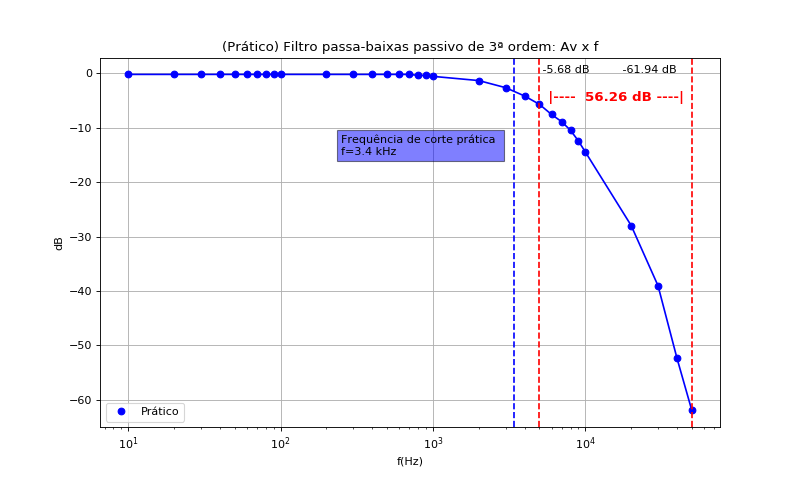

/home/hugo/.virtualenvs/telecom/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/home/hugo/.virtualenvs/telecom/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


In [32]:
db5e3 = 20*np.log10(0.52)
db5e4 = 20*np.log10(0.0008)

plt.figure(figsize=(10,6))
plt.xscale('log')

plt.plot(f, 20*np.log10(av_pratico),'bo', label="Prático")
plt.plot(f, 20*np.log10(av_pratico), 'b')
plt.title('(Prático) Filtro passa-baixas passivo de 3ª ordem: Av x f')
plt.text(250, -15, "Frequência de corte prática \nf=%.1f kHz" %3.4,  bbox=dict(facecolor='blue', alpha=0.5))
plt.axvline(x=3400, color='b', linestyle='--')

plt.axvline(x=5e3, color='r', linestyle='--')
plt.text(5e3, 0, " %.2f dB" %db5e3)
plt.axvline(x=5e4, color='r', linestyle='--')
plt.text(5e4/3, 0, " %.2f dB" %db5e4)

plt.text(5e3, -5, "  |----  %.2f dB ----|" %(db5e3-db5e4), color="red", fontweight='bold', fontsize="12")

plt.ylabel('dB')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

### Comparação do ganho de tensão prático com o teórico 

---------------------------------- 
 Erro quadrático médio = 0.000952 
----------------------------------


<IPython.core.display.Javascript object>


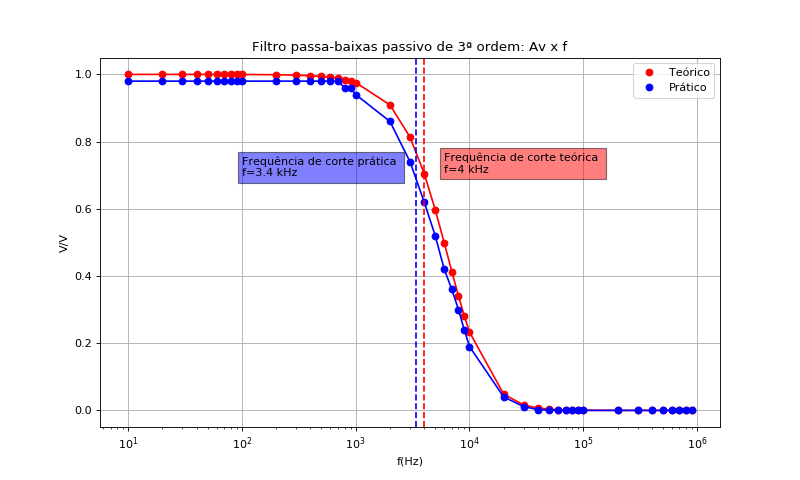

In [33]:
err = mean_squared_error(av_teorico, av_pratico)
print("---------------------------------- \n Erro quadrático médio = %f \n----------------------------------" %err)

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, av_teorico,'ro', label="Teórico")
plt.plot(f, av_teorico,'r')
plt.plot(f, av_pratico,'bo', label="Prático")
plt.plot(f, av_pratico,'b')
plt.title('Filtro passa-baixas passivo de 3ª ordem: Av x f')
plt.text(6000, 0.707, "Frequência de corte teórica \nf=%d kHz" %4,  bbox=dict(facecolor='red', alpha=0.5))
plt.axvline(x=4000, color='r', linestyle='--')
plt.text(100, 0.696, "Frequência de corte prática \nf=%.1f kHz" %3.4,  bbox=dict(facecolor='blue', alpha=0.5))
plt.axvline(x=3400, color='b', linestyle='--')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

### Comparação do ganho de tensão prático desconsiderando as perdas de inserção com o teórico 

---------------------------------- 
 Erro quadrático médio = 0.000572 
----------------------------------


<IPython.core.display.Javascript object>


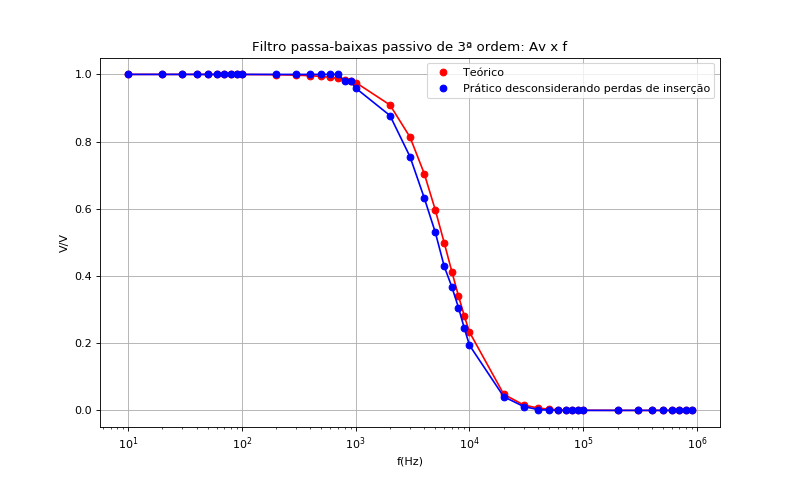

In [17]:
def normalizar(dados: object):
    return (dados - np.min(dados, axis=0)) / (np.max(dados, axis=0) - np.min(dados, axis=0)) 

av_pratico_normalizado = normalizar(av_pratico)

err = mean_squared_error(av_teorico, av_pratico_normalizado)
print("---------------------------------- \n Erro quadrático médio = %f \n----------------------------------" %err)

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, av_teorico,'ro', label="Teórico")
plt.plot(f, av_teorico,'r')
plt.plot(f, av_pratico_normalizado,'bo', label="Prático desconsiderando perdas de inserção")
plt.plot(f, av_pratico_normalizado,'b')
plt.title('Filtro passa-baixas passivo de 3ª ordem: Av x f')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

### Comparação do Av prático desconsiderando as perdas de inserção com a Simulação do LTSpice


<IPython.core.display.Javascript object>


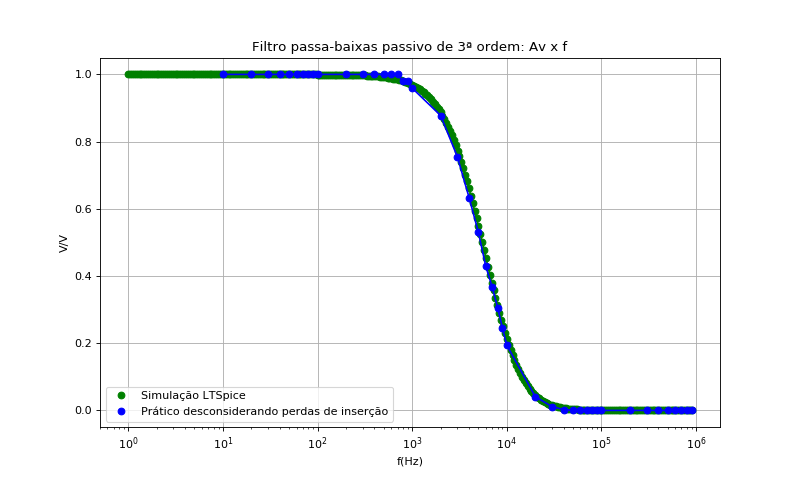

In [34]:
plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f_ltspice, av_ltspice,'go', label="Simulação LTSpice")
plt.plot(f_ltspice, av_ltspice,'g')
plt.plot(f, av_pratico_normalizado,'bo', label="Prático desconsiderando perdas de inserção")
plt.plot(f, av_pratico_normalizado,'b')
plt.title('Filtro passa-baixas passivo de 3ª ordem: Av x f')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

### Comparação do defasamento prático com o teórico 

<IPython.core.display.Javascript object>


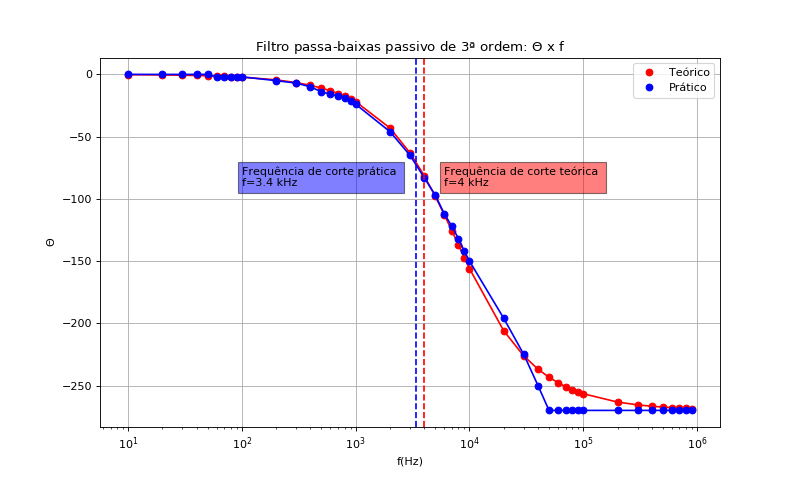

In [35]:
plt.figure(figsize=(10,6))
plt.title(r"Filtro passa-baixas passivo de 3ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f, fase_teorica,'ro', label="Teórico")
plt.plot(f, fase_teorica, 'r')
plt.plot(f, fase_pratica,'bo', label="Prático")
plt.plot(f, fase_pratica, 'b')
plt.text(6000, -90, "Frequência de corte teórica \nf=%d kHz" %4,  bbox=dict(facecolor='red', alpha=0.5))
plt.axvline(x=4000, color='r', linestyle='--')
plt.text(100, -90, "Frequência de corte prática \nf=%.1f kHz" %3.4,  bbox=dict(facecolor='blue', alpha=0.5))
plt.axvline(x=3400, color='b', linestyle='--')
plt.ylabel(r"$\Theta$")
plt.xlabel('f(Hz)')
plt.grid()
plt.legend()
plt.show()


### Comparação do defasamento prático com a simulação no LTSpice

<IPython.core.display.Javascript object>


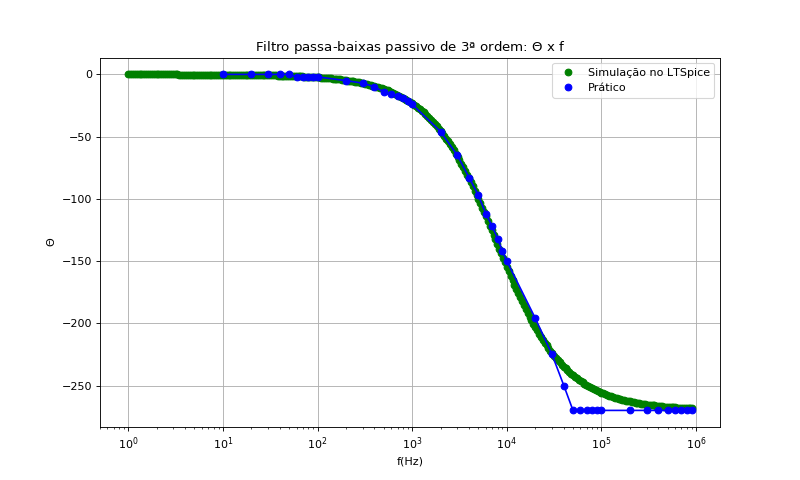

In [36]:
plt.figure(figsize=(10,6))
plt.title(r"Filtro passa-baixas passivo de 3ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f_ltspice, fase_ltspice,'go', label="Simulação no LTSpice")
plt.plot(f_ltspice, fase_ltspice, 'g')
plt.plot(f, fase_pratica,'bo', label="Prático")
plt.plot(f, fase_pratica, 'b')
plt.ylabel(r"$\Theta$")
plt.xlabel('f(Hz)')
plt.grid()
plt.legend()
plt.show()

### Comparação geral do ganho de tensão

<IPython.core.display.Javascript object>


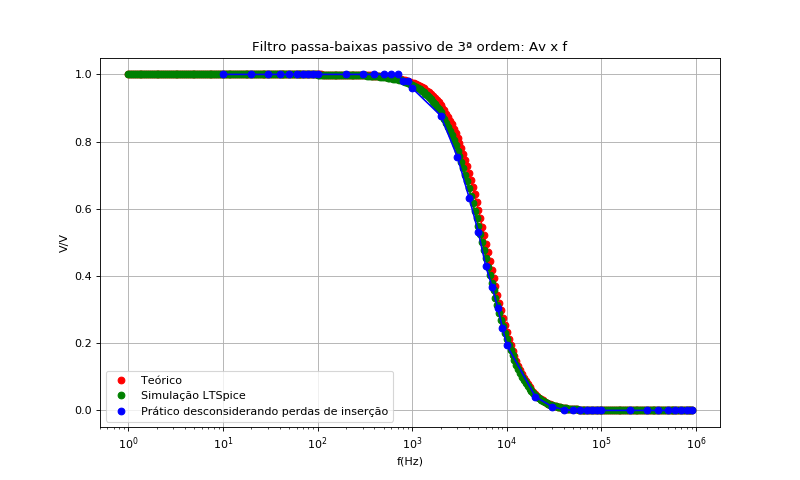

In [41]:
av_teorico = np.zeros(len(f_ltspice))

def Av(f_ltspice): 
    return (1/math.sqrt(1 + (2 * math.pi * fi * R * C)**2))**3

for i, fi in enumerate(f_ltspice):
    av_teorico[i] = Av(fi)

    
plt.figure(figsize=(10,6))
plt.xscale('log')

plt.plot(f_ltspice, av_teorico,'ro', label="Teórico")
plt.plot(f_ltspice, av_teorico, 'r')
plt.plot(f_ltspice, av_ltspice,'go', label="Simulação LTSpice")
plt.plot(f_ltspice, av_ltspice,'g')
plt.plot(f, av_pratico_normalizado,'bo', label="Prático desconsiderando perdas de inserção")
plt.plot(f, av_pratico_normalizado,'b')
plt.title('Filtro passa-baixas passivo de 3ª ordem: Av x f')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


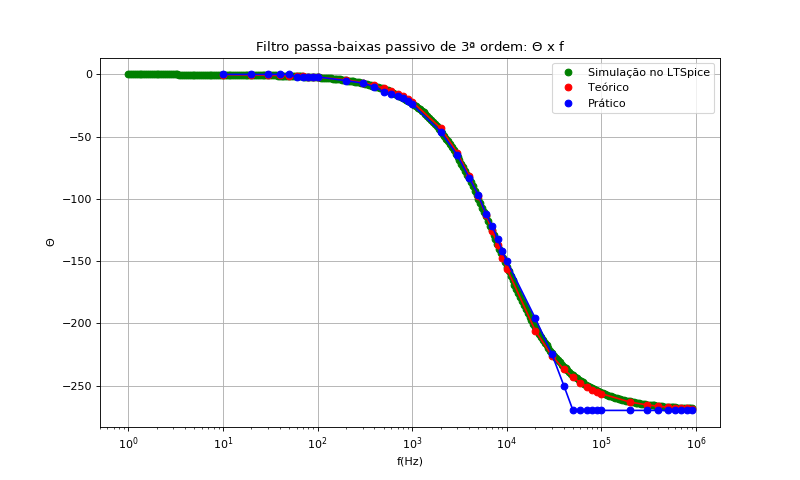

In [38]:
plt.figure(figsize=(10,6))
plt.title(r"Filtro passa-baixas passivo de 3ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f_ltspice, fase_ltspice,'go', label="Simulação no LTSpice")
plt.plot(f_ltspice, fase_ltspice, 'g')
plt.plot(f, fase_teorica,'ro', label="Teórico")
plt.plot(f, fase_teorica, 'r')
plt.plot(f, fase_pratica,'bo', label="Prático")
plt.plot(f, fase_pratica, 'b')
plt.ylabel(r"$\Theta$")
plt.xlabel('f(Hz)')
plt.grid()
plt.legend()
plt.show()
